## **Install and load the required packages**

In [ ]:
|if (!require("BiocManager", quietly = TRUE))
    install.packages("BiocManager")

BiocManager::install("limma")
install.packages('ggrepel')
install.packages("WebGestaltR")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

'getOption("repos")' replaces Bioconductor standard repositories, see
'help("repositories", package = "BiocManager")' for details.
Replacement repositories:
    CRAN: https://cran.rstudio.com

Bioconductor version 3.22 (BiocManager 1.30.27), R 4.5.2 (2025-10-31)

Installing package(s) 'BiocVersion', 'limma'

also installing the dependency ‘statmod’


Old packages: 'blob', 'cpp11', 'data.table', 'gert', 'knitr', 'later',
  'lifecycle', 'purrr', 'rappdirs', 'Rcpp', 'rlang', 'rstudioapi', 'selectr',
  'survival', 'testthat', 'tibble', 'tidyr', 'uuid', 'vctrs', 'xfun', 'xml2',
  'yaml'

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘rngtools’, ‘iterators’, ‘doRNG’, ‘doParallel’, ‘foreach’, ‘svglite’, ‘igraph’, ‘apcluster’




In [ ]:
library(dplyr)
library(ggplot2)
library(tidyr)
library(limma)
library(ggrepel)
library(WebGestaltR)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


******************************************


*                                        *


*          Welcome to WebGestaltR !      *


*                                        *


******************************************




### **Read in the 3 csv files**

In [ ]:
exp_data <- read.csv('/content/X.csv', header=FALSE)
metadata <-read.csv('/content/obs.csv')
var_data<- read.csv('/content/var.csv')

head(exp_data)
head(metadata)
head(var_data)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,⋯,V5842,V5843,V5844,V5845,V5846,V5847,V5848,V5849,V5850,V5851
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,-0.09446754,-0.216262,-0.1680179,-0.07628149,-0.1851184,-0.2289965,-0.1256334,-0.2100703,-0.1098231,-0.08605047,⋯,8.4439458,-0.2299743,-0.1876729,-0.2382954,-0.2910066,-0.06937566,-0.3154077,-0.1775671,-0.06982737,-0.3230621
2,-0.09446754,-0.216262,-0.1680179,-0.07628149,-0.1851184,-0.2289965,-0.1256334,-0.2100703,-0.1098231,-0.08605047,⋯,-0.2414715,-0.2299743,-0.1876729,-0.2382954,-0.2910066,-0.06937566,-0.3154077,-0.1775671,-0.06982737,-0.3230621
3,-0.09446754,-0.216262,-0.1680179,-0.07628149,-0.1851184,-0.2289965,-0.1256334,-0.2100703,-0.1098231,-0.08605047,⋯,-0.2414715,-0.2299743,-0.1876729,-0.2382954,-0.2910066,-0.06937566,-0.3154077,-0.1775671,-0.06982737,-0.3230621
4,-0.09446754,-0.216262,-0.1680179,-0.07628149,-0.1851184,-0.2289965,-0.1256334,-0.2100703,-0.1098231,-0.08605047,⋯,-0.2414715,-0.2299743,-0.1876729,-0.2382954,-0.2910066,-0.06937566,-0.3154077,-0.1775671,-0.06982737,-0.3230621
5,-0.09446754,-0.216262,-0.1680179,-0.07628149,-0.1851184,-0.2289965,-0.1256334,-0.2100703,-0.1098231,-0.08605047,⋯,-0.2414715,-0.2299743,-0.1876729,-0.2382954,-0.1083122,-0.06937566,5.3992868,-0.1775671,-0.06982737,-0.3230621
6,-0.09446754,-0.216262,-0.1680179,-0.07628149,-0.1851184,-0.2289965,-0.1256334,-0.2100703,-0.1098231,-0.08605047,⋯,-0.2414715,-0.2299743,-0.1876729,-0.2382954,-0.2910066,-0.06937566,-0.3154077,-0.1775671,-0.06982737,-0.3230621


,CellID,Patient,Author,Tissue,Disease_stage,Age,n_genes,n_genes_by_counts,total_counts,pct_counts_in_top_50_genes,pct_counts_in_top_100_genes,pct_counts_in_top_200_genes,pct_counts_in_top_500_genes,leiden,Celltype
,<chr>,<int>,<chr>,<chr>,<chr>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<chr>
1,sc_b1_A08,33572,Hu_2020,Benign fallopian tube cells,Benign,64,1326,1326,142098,24.09182,36.65006,55.25201,86.71480,0,Secretory Epithelial-1
2,sc_b1_B06,34350,Hu_2020,Benign fallopian tube cells,Benign,50,1599,1599,273240,25.74294,34.62194,47.67201,74.23291,0,Secretory Epithelial-1
3,sc_b1_B08,34350,Hu_2020,Benign fallopian tube cells,Benign,50,2298,2298,193108,24.94614,32.24620,42.47468,62.87777,1,Secretory Epithelial-2
4,sc_b1_B11,34350,Hu_2020,Benign fallopian tube cells,Benign,50,2100,2100,195696,20.84202,29.20755,41.62834,66.75303,0,Secretory Epithelial-1
5,sc_b1_C15,34350,Hu_2020,Benign fallopian tube cells,Benign,50,1793,1793,279434,19.77569,27.73965,39.91712,66.52304,1,Secretory Epithelial-2
6,sc_b1_C18,33572,Hu_2020,Benign fallopian tube cells,Benign,64,1335,1335,328526,27.70253,36.29728,49.93090,78.92983,0,Secretory Epithelial-1


,Gene,n_cells,n_cells_by_counts,mean_counts,pct_dropout_by_counts,total_counts,highly_variable,means,dispersions,dispersions_norm,mean,std
,<chr>,<int>,<int>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,PLEKHN1,127,127,1.582620,97.21308,7212,True,0.01804155,1.833444,0.7781531,0.009044333,0.09574012
2,C1orf159,383,383,11.393461,91.59535,51920,True,0.15081387,1.673782,0.6673490,0.065633356,0.30348997
3,B3GALT6,287,287,4.430546,93.70200,20190,True,0.06731816,1.507138,0.5517003,0.032744878,0.19488919
4,FAM132A,39,39,1.260478,99.14417,5744,True,0.01762634,1.701863,0.6868375,0.007682837,0.10071693
5,SCNN1D,329,329,7.168751,92.78034,32668,True,0.10859225,1.673323,0.6670306,0.047073752,0.25428997
6,PUSL1,425,425,13.996269,90.67369,63781,True,0.15783719,2.050473,0.9287682,0.070341273,0.30717181


**Make the row names of exp_data be CellIDs, and the column names be gene names**

In [ ]:
rownames(exp_data)<-metadata$CellID
colnames(exp_data)<-var_data$Gene

head(exp_data)

,PLEKHN1,C1orf159,B3GALT6,FAM132A,SCNN1D,PUSL1,MXRA8,LOC148413,CDK11B,LOC100129534,⋯,DNASE1L1,TAZ,PLXNA3,UBL4A,SLC10A3,GAB3,MPP1,F8,RAB39B,TMLHE
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
sc_b1_A08,-0.09446754,-0.216262,-0.1680179,-0.07628149,-0.1851184,-0.2289965,-0.1256334,-0.2100703,-0.1098231,-0.08605047,⋯,8.4439458,-0.2299743,-0.1876729,-0.2382954,-0.2910066,-0.06937566,-0.3154077,-0.1775671,-0.06982737,-0.3230621
sc_b1_B06,-0.09446754,-0.216262,-0.1680179,-0.07628149,-0.1851184,-0.2289965,-0.1256334,-0.2100703,-0.1098231,-0.08605047,⋯,-0.2414715,-0.2299743,-0.1876729,-0.2382954,-0.2910066,-0.06937566,-0.3154077,-0.1775671,-0.06982737,-0.3230621
sc_b1_B08,-0.09446754,-0.216262,-0.1680179,-0.07628149,-0.1851184,-0.2289965,-0.1256334,-0.2100703,-0.1098231,-0.08605047,⋯,-0.2414715,-0.2299743,-0.1876729,-0.2382954,-0.2910066,-0.06937566,-0.3154077,-0.1775671,-0.06982737,-0.3230621
sc_b1_B11,-0.09446754,-0.216262,-0.1680179,-0.07628149,-0.1851184,-0.2289965,-0.1256334,-0.2100703,-0.1098231,-0.08605047,⋯,-0.2414715,-0.2299743,-0.1876729,-0.2382954,-0.2910066,-0.06937566,-0.3154077,-0.1775671,-0.06982737,-0.3230621
sc_b1_C15,-0.09446754,-0.216262,-0.1680179,-0.07628149,-0.1851184,-0.2289965,-0.1256334,-0.2100703,-0.1098231,-0.08605047,⋯,-0.2414715,-0.2299743,-0.1876729,-0.2382954,-0.1083122,-0.06937566,5.3992868,-0.1775671,-0.06982737,-0.3230621
sc_b1_C18,-0.09446754,-0.216262,-0.1680179,-0.07628149,-0.1851184,-0.2289965,-0.1256334,-0.2100703,-0.1098231,-0.08605047,⋯,-0.2414715,-0.2299743,-0.1876729,-0.2382954,-0.2910066,-0.06937566,-0.3154077,-0.1775671,-0.06982737,-0.3230621


##**Initial visualisations of the data**
**Calculate the total number of cells per patient**


In [ ]:
cells_per_patient <- metadata %>%
  group_by(Patient) %>%
  tally()
names(cells_per_patient) <- c('Patient','Total_Cells')
cells_per_patient

Patient,Total_Cells
<int>,<int>
11543,221
11545,503
11553,650
15066,481
15072,525
33572,481
33778,175
34350,238
34659,918


In [ ]:
head(cells_per_patient)

Patient,Total_Cells
<int>,<int>
11543,221
11545,503
11553,650
15066,481
15072,525
33572,481


**Use ggplot to plot this as a bar graph**

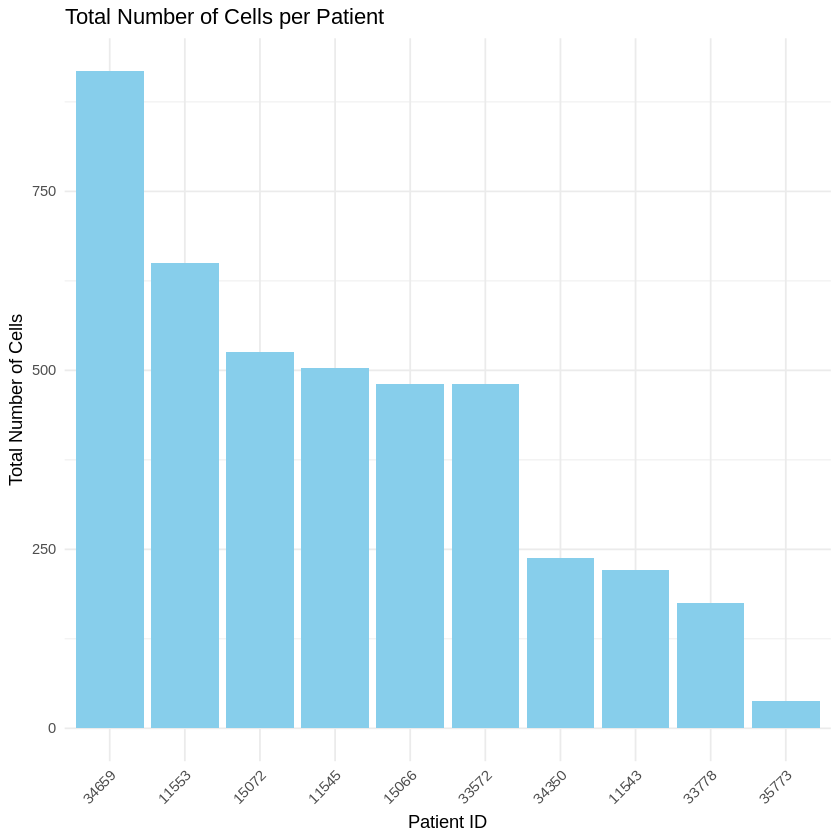

In [ ]:
ggplot(cells_per_patient, aes(x = reorder(Patient, -Total_Cells), y = Total_Cells)) +
  geom_bar(stat = "identity", fill = "skyblue") +
  labs(title = "Total Number of Cells per Patient", x = "Patient ID", y = "Total Number of Cells") +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))

**Figure Interpretation**:

This bar chart quantifies the total number of cells recovered from each patient (donor) included in the dataset. The plot highlights a significant variance in sampling depth across the cohort: Patient 34659 contributes the highest volume of data (approximately 900 cells), whereas Patient 35773 has a minimal contribution (fewer than 50 cells). This heterogeneity in donor representation is a critical quality control metric, as it suggests that downstream analyses, such as clustering or differential expression, could be disproportionately influenced by the biological signals of the most abundant donors if not addressed through normalization or batch correction methods.

**Calculate and plot total cell counts per disease stage**

In [ ]:
cells_per_stage <- metadata %>%
  group_by(Disease_stage) %>%
  tally()
names(cells_per_stage) <- c('Disease_stage','Total_Cells')

Saving 6.67 x 6.67 in image


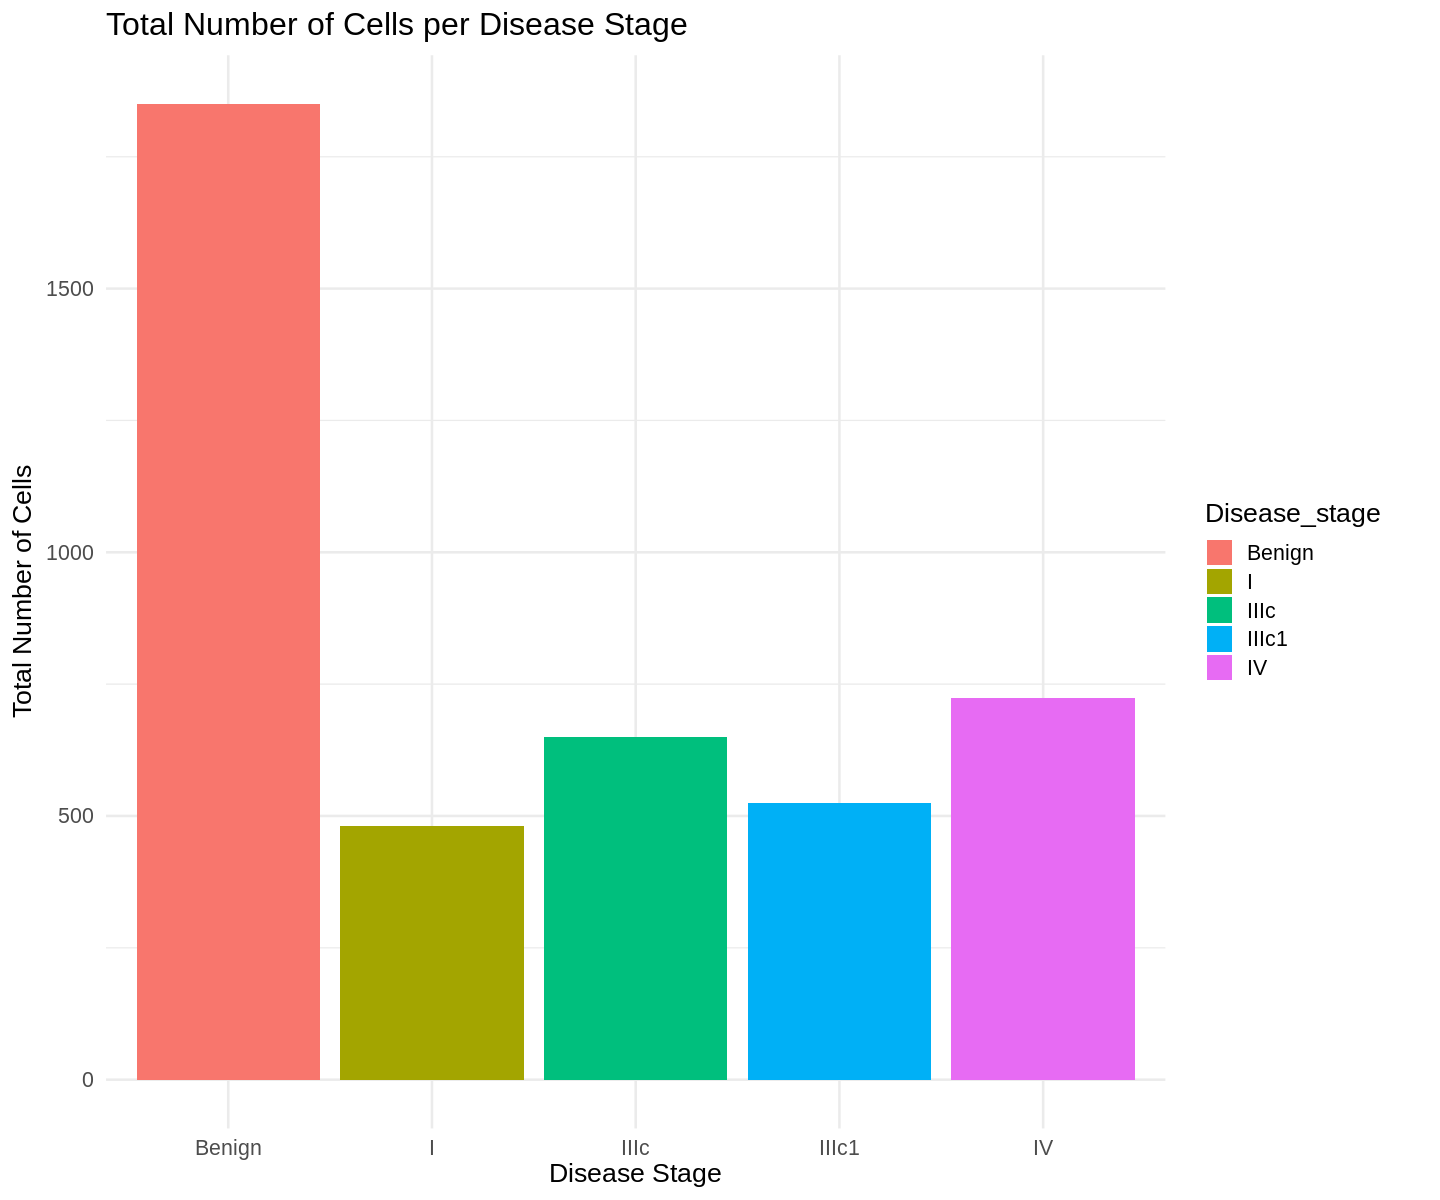

In [ ]:
cells_per_stage_plot <- ggplot(cells_per_stage, aes(x = Disease_stage, y = Total_Cells, fill = Disease_stage)) +
  geom_bar(stat = "identity") +
  labs(title = "Total Number of Cells per Disease Stage", x = "Disease Stage", y = "Total Number of Cells") +
  theme_minimal(base_size = 16)

ggsave("/content/cells_per_stage_plot.png", plot = cells_per_stage_plot)
cells_per_stage_plot

**Figure Interpretation**:

This bar chart aggregates the cell counts by disease stage, revealing a notable imbalance in the dataset composition. The Benign group (salmon) is the most heavily represented, containing significantly more cells (>1,800) than any individual cancer stage. In contrast, the malignant samples, spanning stages I (olive), IIIc (green), IIIc1 (blue), and IV (purple), are comparatively underrepresented, with cell counts ranging roughly between 500 and 750 per stage. This distribution indicates that while the dataset provides a robust baseline for healthy tissue, the statistical power for detecting differences between specific cancer stages may be lower due to the smaller sample sizes in the malignant groups.

**Calculate and plot counts of cell types per disease stage**

In [ ]:
cell_counts <- metadata %>%
  group_by(Celltype, Disease_stage) %>%
  tally()

Saving 6.67 x 6.67 in image


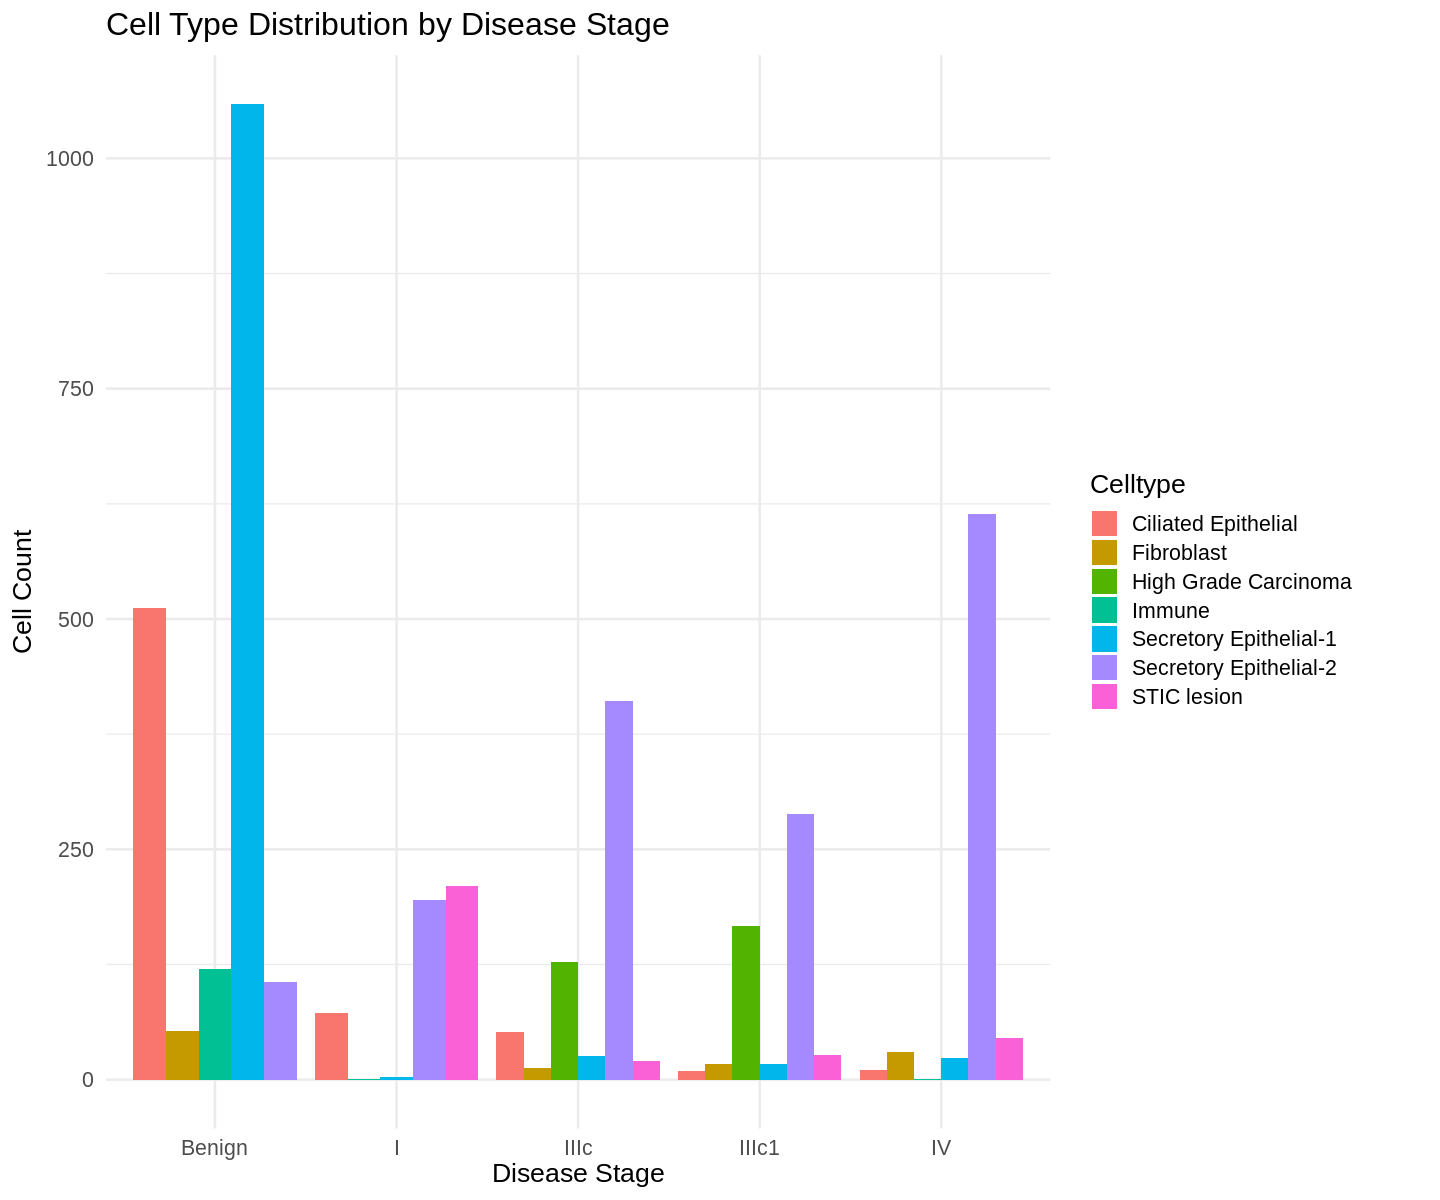

In [ ]:
cell_counts_plot <- ggplot(cell_counts, aes(x = Disease_stage, y = n, fill = Celltype)) +
  geom_bar(stat = "identity", position = "dodge") +
  labs(title = "Cell Type Distribution by Disease Stage", x = "Disease Stage", y = "Cell Count") +
  theme_minimal(base_size = 16)

ggsave("/content/cell_counts_plot.png", plot = cell_counts_plot)
cell_counts_plot

**Figure Interpretation**:

This grouped bar chart illustrates the dramatic shift in cellular composition that occurs between healthy and malignant states. In the Benign samples, the tissue is dominated by normal Secretory Epithelial-1 (light blue) and Ciliated Epithelial (salmon) cells, reflecting the typical homeostasis of the fallopian tube. However, across all cancer stages (I through IV), there is a marked depletion of these healthy populations, which are effectively replaced by Secretory Epithelial-2 (purple) cells, which is a population that becomes overwhelmingly dominant in the diseased tissue. Furthermore, the cancer stages see the emergence and expansion of specific malignant populations, including High Grade Carcinoma cells (green) and STIC lesions (pink), confirming that the disease progression involves a fundamental remodeling of the epithelial ecosystem.

## **Differential gene expression**

In this step, we perform a differential gene expression (DGE) analysis to characterize the molecular differences between the healthy Secretory Epithelial-1 cells and the cancer-associated Secretory Epithelial-2 population. Using the limma package (Linear Models for Microarray Data), which is adapted here for single-cell data, we fit a linear model to the expression data of these two specific subsets. The analysis utilizes an empirical Bayes method (eBayes) to moderate standard errors and compute stable t-statistics. We then visualize the results using a Volcano Plot, which plots the log2 fold change against the statistical significance (-log10 p-value). Genes meeting the significance threshold (p-value < 0.05 and |logFC| > 1) are highlighted in red and labeled, allowing us to identify top upregulated and downregulated markers that drive the transcriptomic shift from the normal secretory state to the disease-associated state.

**Subset the metadata and expression data to the two secretory epithelial cell types**

In [ ]:
secretorymeta<- subset(metadata, metadata$Celltype %in%c('Secretory Epithelial-1','Secretory Epithelial-2'))
secretoryexp<- subset(exp_data, rownames(exp_data) %in% secretorymeta$CellID)

**Check dimensions of secretory cell metadata and expression match**


In [ ]:
dim(secretorymeta)
dim(secretoryexp)

[1] 2742   15

[1] 2742 5851

**Transpose the expression matrix**

In [ ]:
secretoryexp <- t(secretoryexp)
identical(colnames(secretoryexp), secretorymeta$CellID)

[1] TRUE

**Perform differential gene expression test**:

In [ ]:
design <- model.matrix(~ Celltype, data = secretorymeta)
fit <- lmFit(secretoryexp, design)
fit <- eBayes(fit, trend = TRUE)

**Print top 20 differentially expressed gene**

In [ ]:
top20genes <- topTable(fit, coef = 2, number = 20)
print(top20genes)

             logFC      AveExpr         t       P.Value     adj.P.Val        B
DNAJB1   1.4062627  0.142315431  49.00135  0.000000e+00  0.000000e+00 853.1227
MAFF     1.3778254  0.168383814  44.62554  0.000000e+00  0.000000e+00 739.5503
SERTAD1  1.3430332  0.124781415  42.82456 2.739357e-307 5.342660e-304 693.2463
SOD2     1.1602063  0.017821231  37.74321 1.913977e-251 2.799671e-248 564.9803
RND3     1.2265344  0.082249456  37.52431 4.395981e-249 5.144176e-246 559.5570
ZC3H12A  1.2198683  0.102495529  37.40139 9.265636e-248 9.035539e-245 556.5164
CLDN10  -1.2270969  0.128654101 -36.93004 1.072158e-242 8.961710e-240 544.8863
NR4A1    1.0871123  0.222794414  33.88127 1.655037e-210 1.210453e-207 470.9532
SLC40A1 -1.1332151  0.130464704 -33.39883 1.631700e-205 1.060787e-202 459.4833
ATF3     1.1110467  0.214488462  33.37096 3.164240e-205 1.851397e-202 458.8227
CYR61    1.1093335  0.162107924  33.21465 1.292031e-203 6.872428e-201 455.1225
NCOA7    1.1026419  0.215414113  32.39760 3.012891e-

**Plot a volcano plot of top 100 differentially expressed genes**

In [ ]:
top_genes_df <- topTable(fit, coef = 2, number = 100)
top_genes_df$significance <- ifelse(top_genes_df$P.Value < 0.05 & abs(top_genes_df$logFC) > 1,
                                    "Significant", "Not Significant")

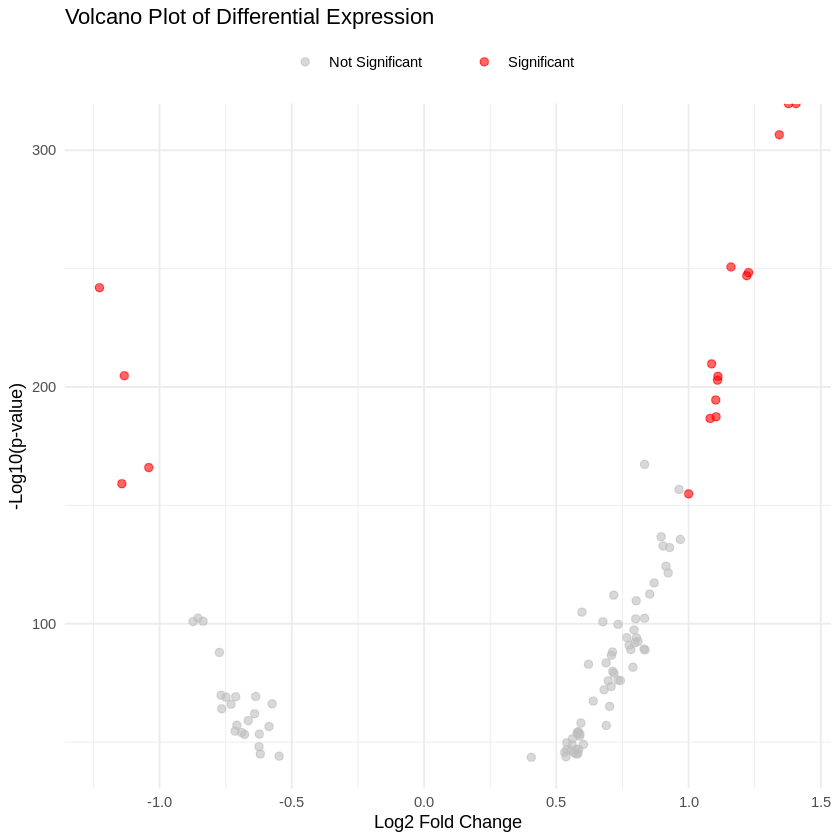

In [ ]:
volcanoplot <- ggplot(top_genes_df, aes(x = logFC, y = -log10(P.Value), color = significance)) +
  geom_point(alpha = 0.6, size = 2) +
  scale_color_manual(values = c("Not Significant" = "gray", "Significant" = "red")) +
  theme_minimal() +
  labs(title = "Volcano Plot of Differential Expression",
       x = "Log2 Fold Change", y = "-Log10(p-value)") +
  theme(legend.title = element_blank()) +
  theme(legend.position = "top")

volcanoplot

**Add gene names to the singificantly differentially expressed genes**

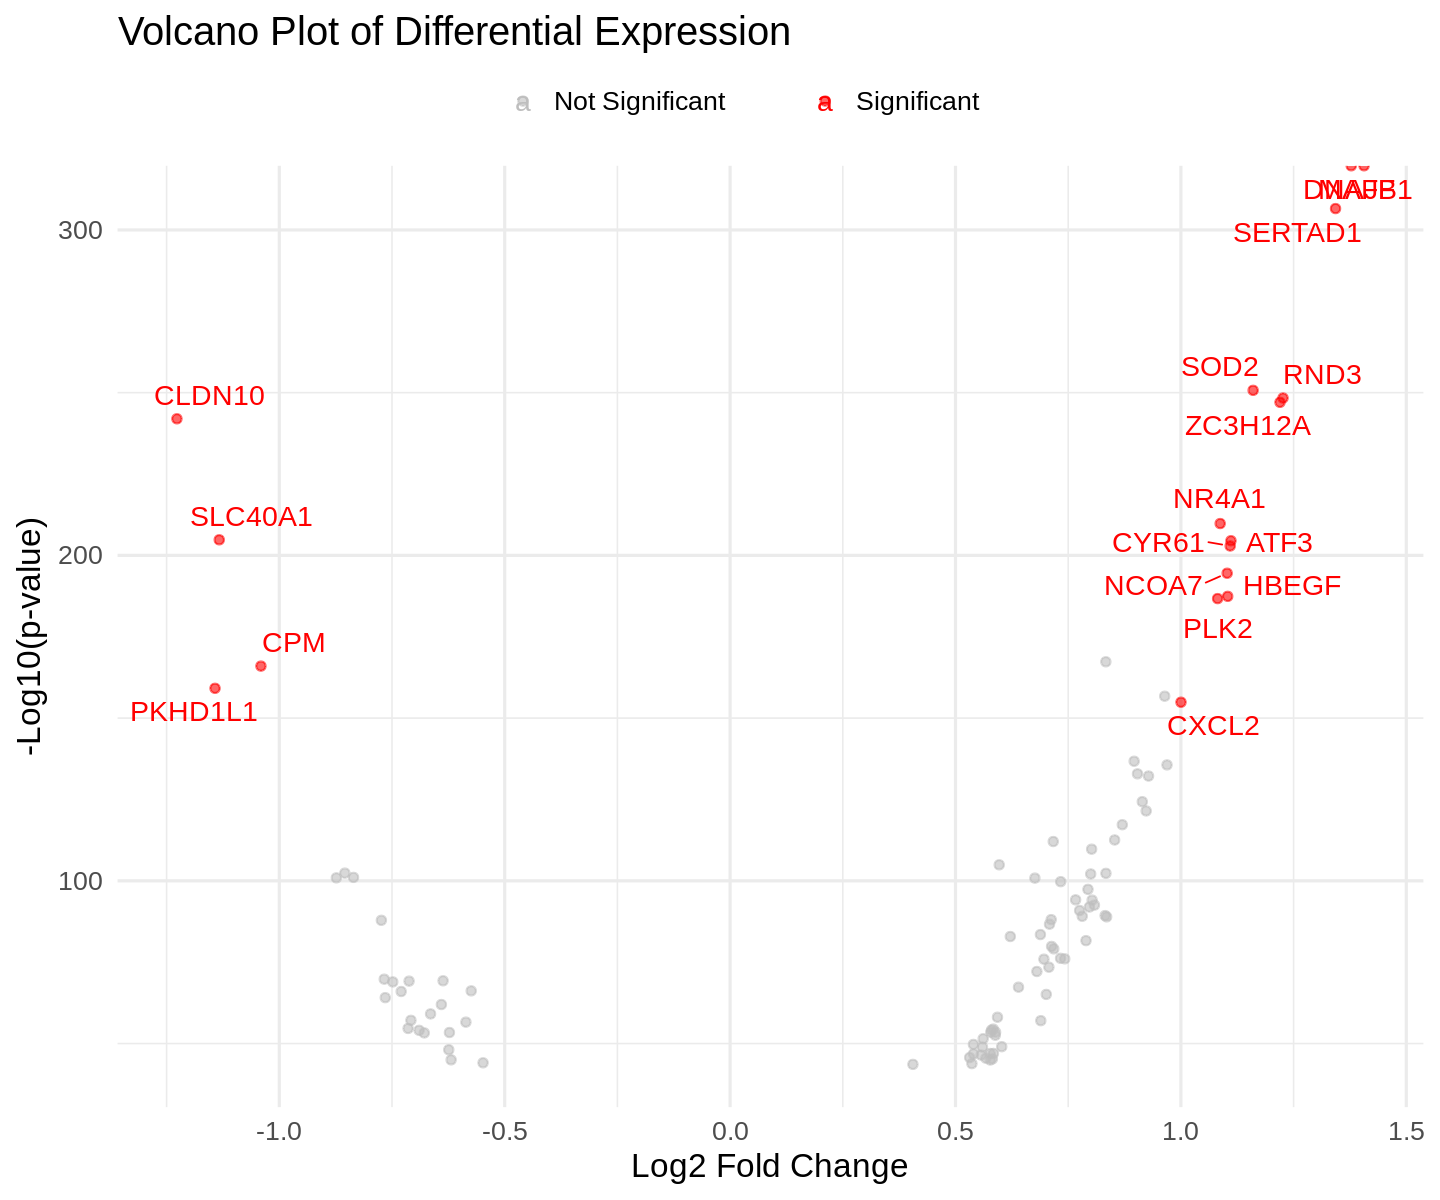

In [ ]:
options(repr.plot.width = 12, repr.plot.height = 10)

volcanoplotlabelled <- volcanoplot +
  theme_minimal(base_size = 20) +
  theme(legend.title = element_blank(), legend.position = "top") +
  geom_text_repel(aes(label = ifelse(significance == "Significant", rownames(top_genes_df), "")),
                                                       box.padding = 0.5, point.padding = 0.5,
                                                       max.overlaps = 10, size = 6)

ggsave("/content/volcanoplot.png", plot = volcanoplotlabelled, width = 12, height = 10)
volcanoplotlabelled

**Figure Explanation**:

The volcano plot visualizes the landscape of transcriptional differences, where the x-axis represents the magnitude of expression change (log2 Fold Change) and the y-axis indicates statistical significance (−log10 P-value). Red points denote genes meeting the significance criteria, while grey points represent non-significant background features. The plot shows a striking asymmetry in gene regulation. The group associated with positive fold changes (right) shows strong upregulation of immediate-early and stress-response genes, including NR4A1, ATF3, CYR61, CXCL2, and SOD2, suggesting this subpopulation may be undergoing cellular stress or an inflammatory response. Conversely, the opposing population (left, negative fold changes) is defined by the expression of functional epithelial markers such as the tight junction protein CLDN10 and the iron transporter SLC40A1.

##**Gene Set Enrichment Analysis**:

In this functional analysis step, we utilize the WebGestaltR package to perform Gene Set Enrichment Analysis (GSEA) on the specific epithelial subpopulations of interest: healthy Secretory Epithelial-1, cancer-associated Secretory Epithelial-2, and STIC lesions. First, we extract and format ranked gene lists for each cell type based on their differential expression markers. These ranked lists are then queried against the KEGG pathway database to identify statistically significant biological pathways (using enrichMethod = "GSEA"). Finally, the results are aggregated and visualized in a dot plot, where the size and color of the points correspond to the False Discovery Rate (FDR) and p-value, allowing for a comparative view of the distinct signaling and metabolic pathways activated during the transition from healthy tissue to precursor lesions and carcinoma.

**Importing the list of ranked genes from cell types we generated using Scanpy**

In [ ]:
rankedgenes <- read.csv("/content/celltypemarkergenes.csv")
head(rankedgenes)


,Secretory.Epithelial.1_n,Secretory.Epithelial.1_s,Secretory.Epithelial.2_n,Secretory.Epithelial.2_s,STIC.lesion_n,STIC.lesion_s,Ciliated.Epithelial_n,Ciliated.Epithelial_s,Fibroblast_n,Fibroblast_s,Immune_n,Immune_s,High.Grade.Carcinoma_n,High.Grade.Carcinoma_s
,<chr>,<dbl>,<chr>,<dbl>,<chr>,<dbl>,<chr>,<dbl>,<chr>,<dbl>,<chr>,<dbl>,<chr>,<dbl>
1,CLDN10,30.74710,DNAJB1,37.68798,HLA-DRB1,25.37824,FAM183A,40.50676,TIMP3,16.25925,SRGN,18.64777,HMGA1,27.12001
2,SLC40A1,30.24609,MAFF,36.72523,HLA-DQA1,25.25888,C1orf194,40.50064,UBB,13.45883,LAPTM5,17.20337,S100A10,26.48133
3,SPARCL1,24.47402,ATF3,34.06892,HLA-DPB1,24.67608,C20orf85,40.39793,SPARC,11.99632,RGS1,16.80215,S100A6,25.13075
4,PKHD1L1,23.84137,NR4A1,33.73787,HLA-DPA1,23.77374,CAPS,40.35849,IGFBP5,11.62716,PTPRC,16.33096,KRT7,24.91474
5,SORL1,23.07276,NCOA7,33.50495,HLA-DQB1,22.30958,TPPP3,40.34295,LGALS1,11.52522,ARHGDIB,16.24919,S100A16,24.25871
6,SCGB1D2,16.61122,SERTAD1,33.20293,HSPB8,21.70216,PIFO,40.26876,DCN,11.15032,CD53,15.88344,SH3BGRL3,23.24509


**We will look at Secretory Epithelial-1, Secretory Epithelial-2 and STIC lesion cell clusters**



In [ ]:
SE1 <- rankedgenes[, colnames(rankedgenes) %in% c('Secretory.Epithelial.1_n', 'Secretory.Epithelial.1_s'), drop = FALSE]
SE2 <- rankedgenes[, colnames(rankedgenes) %in% c('Secretory.Epithelial.2_n', 'Secretory.Epithelial.2_s'), drop = FALSE]
STIC <- rankedgenes[, colnames(rankedgenes) %in% c('STIC.lesion_n', 'STIC.lesion_s'), drop = FALSE]


In [ ]:
SE1

Secretory.Epithelial.1_n,Secretory.Epithelial.1_s
<chr>,<dbl>
CLDN10,30.74710
SLC40A1,30.24609
SPARCL1,24.47402
PKHD1L1,23.84137
SORL1,23.07276
SCGB1D2,16.61122
TNFSF10,16.12057
VTCN1,16.10174
CPM,16.04581


In [ ]:
SE2

Secretory.Epithelial.2_n,Secretory.Epithelial.2_s
<chr>,<dbl>
DNAJB1,37.68798
MAFF,36.72523
ATF3,34.06892
NR4A1,33.73787
NCOA7,33.50495
SERTAD1,33.20293
CYR61,31.79018
CXCL2,31.08464
RND3,30.67628


In [ ]:
STIC

STIC.lesion_n,STIC.lesion_s
<chr>,<dbl>
HLA-DRB1,25.37824
HLA-DQA1,25.25888
HLA-DPB1,24.67608
HLA-DPA1,23.77374
HLA-DQB1,22.30958
HSPB8,21.70216
CHI3L1,21.62664
WFDC2,21.56762
SNCG,21.23444


**Save as rank files for input to webgestalt**

In [ ]:
write.table(SE1, file = "/content/SE1rankedgenes.rnk", sep = "\t", row.names = FALSE, col.names = FALSE, quote = FALSE)
write.table(SE2, file = "/content/SE2rankedgenes.rnk", sep = "\t", row.names = FALSE, col.names = FALSE, quote = FALSE)
write.table(STIC, file = "/content/STICrankedgenes.rnk", sep = "\t", row.names = FALSE, col.names = FALSE, quote = FALSE)

**Run Webgestalt GSEA for each rank file**

In [ ]:
SE1Result <- WebGestaltR(
  enrichMethod = "GSEA", organism = "hsapiens",
  enrichDatabase = "pathway_KEGG", interestGeneFile = "/content/SE1rankedgenes.rnk",
  interestGeneType = "genesymbol", sigMethod = "top", topThr = 10, minNum = 5)

SE2Result <- WebGestaltR(
  enrichMethod = "GSEA", organism = "hsapiens",
  enrichDatabase = "pathway_KEGG", interestGeneFile = "/content/SE2rankedgenes.rnk",
  interestGeneType = "genesymbol", sigMethod = "top", topThr = 10, minNum = 5)

STICResult <- WebGestaltR(
  enrichMethod = "GSEA", organism = "hsapiens",
  enrichDatabase = "pathway_KEGG", interestGeneFile = "/content/STICrankedgenes.rnk",
  interestGeneType = "genesymbol", sigMethod = "top", topThr = 10, minNum = 5)

Loading the functional categories...
Loading the ID list...
Summarizing the uploaded ID list by GO Slim data...
Performing the enrichment analysis...


Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for hsa00020
”
Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for hsa00040
”
Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for hsa00062
”
Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for hsa00072
”
Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for hsa00130
”
Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for hsa00220


1000 permutations of score complete...
Begin affinity propagation...
End affinity propagation...
Begin weighted set cover...
End weighted set cover...
Generate the final report...
Results can be found in the /content/Project_1769250854!
Loading the functional categories...
Loading the ID list...
Summarizing the uploaded ID list by GO Slim data...
Performing the enrichment analysis...


Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for hsa00020
”
Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for hsa00040
”
Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for hsa00062
”
Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for hsa00072
”
Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for hsa00130
”
Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for hsa00220


1000 permutations of score complete...
Begin affinity propagation...
End affinity propagation...
Begin weighted set cover...
End weighted set cover...
Generate the final report...
Results can be found in the /content/Project_1769251023!
Loading the functional categories...
Loading the ID list...
Summarizing the uploaded ID list by GO Slim data...
Performing the enrichment analysis...


Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for hsa00020
”
Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for hsa00040
”
Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for hsa00062
”
Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for hsa00072
”
Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for hsa00130
”
Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for hsa00220


1000 permutations of score complete...
Begin affinity propagation...
End affinity propagation...
Begin weighted set cover...
Remain is 0, ending weighted set cover
Generate the final report...
Results can be found in the /content/Project_1769251191!


**To plot a dotplot of all the results combined**
* Add a column to each result table identify cell type
* Join the results tables together

In [ ]:
SE1Result$Celltype = 'Secretory Epithelial-1'
SE2Result$Celltype = 'Secretory Epithelial-2'
STICResult$Celltype = 'STIC lesion'
gsea<- SE1Result %>% bind_rows(SE2Result) %>% bind_rows(STICResult)
head(gsea)

,geneSet,description,link,enrichmentScore,normalizedEnrichmentScore,pValue,FDR,size,plotPath,leadingEdgeNum,leadingEdgeId,userId,Celltype
,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<chr>,<int>,<chr>,<chr>,<chr>
1,hsa04668,TNF signaling pathway,http://www.kegg.jp/kegg-bin/show_pathway?hsa04668+3569+6364+5594+5602+23118+5743+9586+1435+7412+6376+6885+7187+3553+3627+7124+1906+1326+3726+6347+2921+3659+2919+2920+7128+3383+330,-0.6895719,-1.800636,0.000000000,0.007833058,54,./Project_1769250854_GSEA/hsa04668.png,26,3569;6364;5594;5602;23118;5743;9586;1435;7412;6376;6885;7187;3553;3627;7124;1906;1326;3726;6347;2921;3659;2919;2920;7128;3383;330,BIRC3;CCL2;CCL20;CREB5;CSF1;CX3CL1;CXCL1;CXCL10;CXCL2;CXCL3;EDN1;ICAM1;IL1B;IL6;IRF1;JUNB;MAP3K7;MAP3K8;MAPK1;MAPK10;PTGS2;TAB2;TNF;TNFAIP3;TRAF3;VCAM1,Secretory Epithelial-1
2,hsa05016,Huntington disease,http://www.kegg.jp/kegg-bin/show_pathway?hsa05016+23186+9586+146754+196385+55567+1639+8701+27019+1767+1768+1770+56171+7052+201625+5438+6648,-0.7370551,-1.765008,0.000000000,0.011260021,27,./Project_1769250854_GSEA/hsa05016.png,16,23186;9586;146754;196385;55567;1639;8701;27019;1767;1768;1770;56171;7052;201625;5438;6648,CREB5;DCTN1;DNAH10;DNAH11;DNAH12;DNAH2;DNAH3;DNAH5;DNAH6;DNAH7;DNAH9;DNAI1;POLR2I;RCOR1;SOD2;TGM2,Secretory Epithelial-1
3,hsa04657,IL-17 signaling pathway,http://www.kegg.jp/kegg-bin/show_pathway?hsa04657+3569+6364+5594+5602+23118+5743+6885+7187+3553+3627+225689+7124+3934+6347+2354+2921+2919+2920+7128+8061,-0.6720836,-1.706247,0.000000000,0.035248761,41,./Project_1769250854_GSEA/hsa04657.png,20,3569;6364;5594;5602;23118;5743;6885;7187;3553;3627;225689;7124;3934;6347;2354;2921;2919;2920;7128;8061,CCL2;CCL20;CXCL1;CXCL10;CXCL2;CXCL3;FOSB;FOSL1;IL1B;IL6;LCN2;MAP3K7;MAPK1;MAPK10;MAPK15;PTGS2;TAB2;TNF;TNFAIP3;TRAF3,Secretory Epithelial-1
4,hsa00450,Selenocompound metabolism,http://www.kegg.jp/kegg-bin/show_pathway?hsa00450+9061+4141+7296,-0.7945332,-1.619620,0.007838746,0.098500704,9,./Project_1769250854_GSEA/hsa00450.png,3,9061;4141;7296,MARS;PAPSS1;TXNRD1,Secretory Epithelial-1
5,hsa04612,Antigen processing and presentation,http://www.kegg.jp/kegg-bin/show_pathway?hsa04612+3111+10437+3113+3115+3117+5641+7124+3303+1520+3304+3308,-0.6703805,-1.599990,0.002159827,0.099731613,24,./Project_1769250854_GSEA/hsa04612.png,11,3111;10437;3113;3115;3117;5641;7124;3303;1520;3304;3308,CTSS;HLA-DOA;HLA-DPA1;HLA-DPB1;HLA-DQA1;HSPA1A;HSPA1B;HSPA4;IFI30;LGMN;TNF,Secretory Epithelial-1
6,hsa05134,Legionellosis,http://www.kegg.jp/kegg-bin/show_pathway?hsa05134+3553+4615+7124+3303+718+3304+2921+2919+2920,-0.6854252,-1.607354,0.000000000,0.102482508,23,./Project_1769250854_GSEA/hsa05134.png,9,3553;4615;7124;3303;718;3304;2921;2919;2920,C3;CXCL1;CXCL2;CXCL3;HSPA1A;HSPA1B;IL1B;MYD88;TNF,Secretory Epithelial-1


**Plot the dot plot**

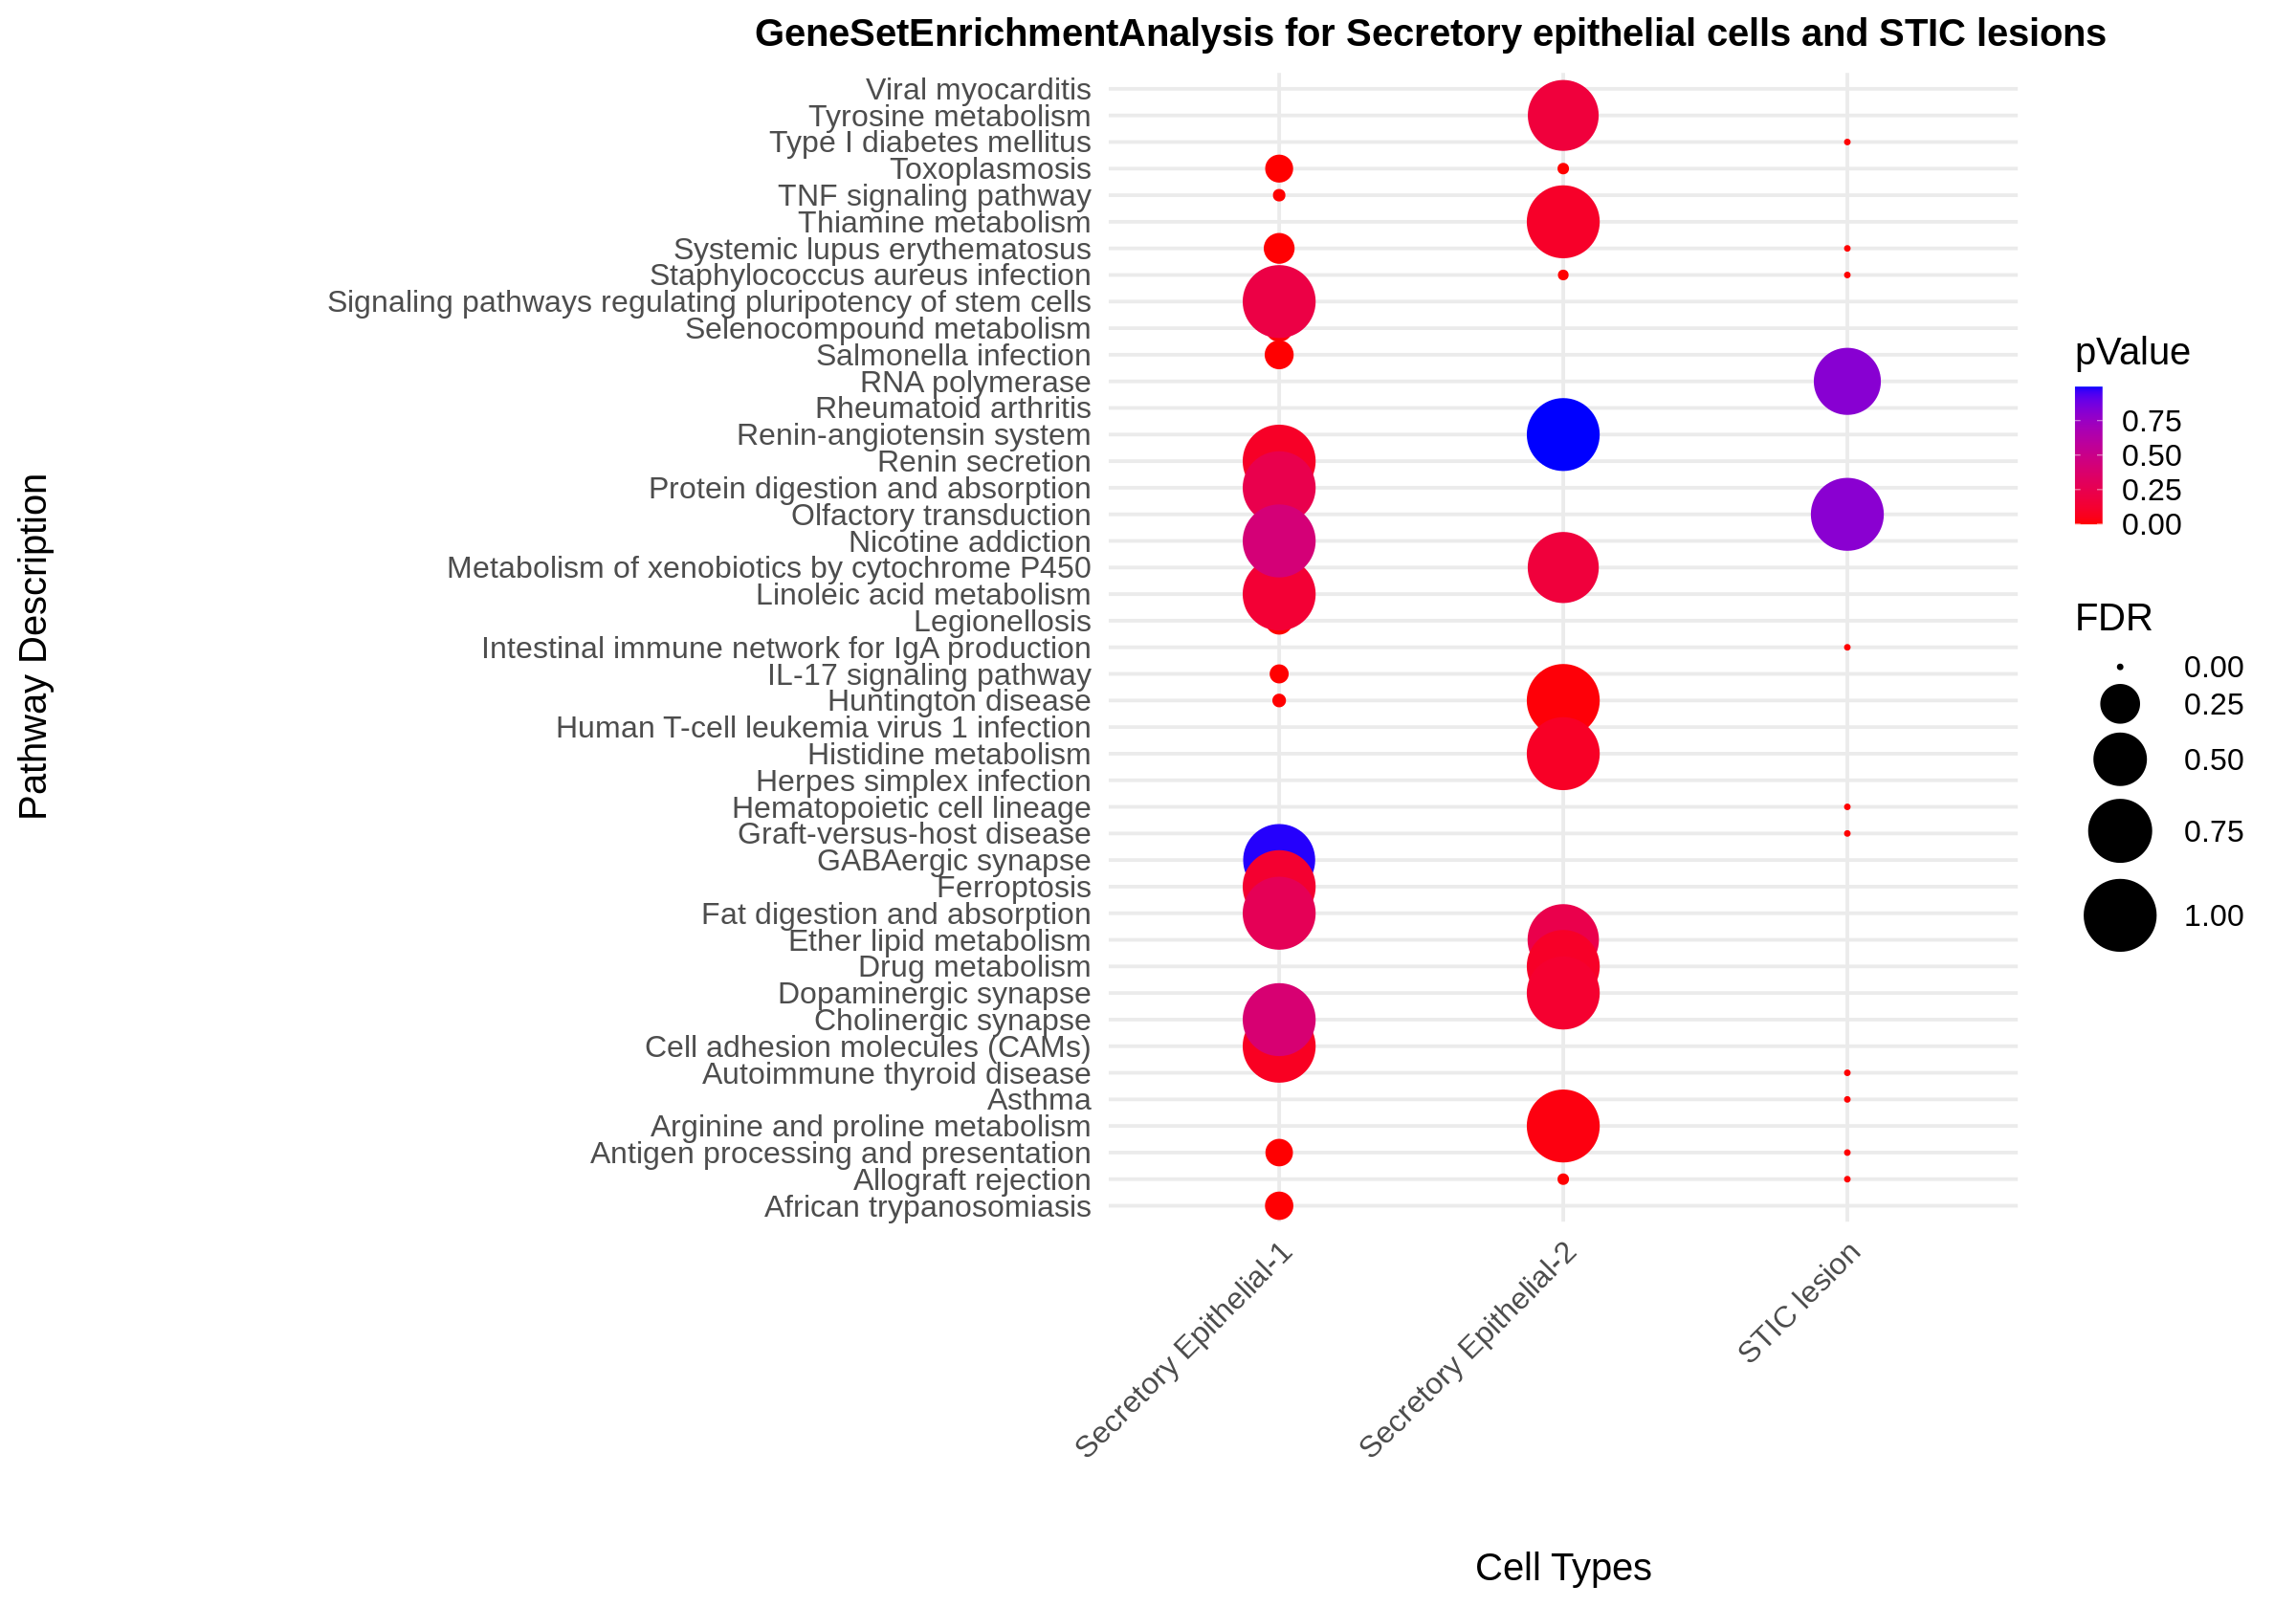

In [ ]:
options(repr.plot.width = 20, repr.plot.height = 14)

gsea_plot <- ggplot(gsea, aes(x = Celltype, y = description)) +
  geom_point(aes(size= FDR, color = pValue)) +
  scale_color_gradient(low = "red", high = "blue", name = "pValue") +
  scale_size_continuous(range = c(0.5, 20)) +
  theme_minimal(base_size = 24) +
  labs(
    title = "GeneSetEnrichmentAnalysis for Secretory epithelial cells and STIC lesions",
    x = "Cell Types",
    y = "Pathway Description"
  ) +
  theme(axis.text.x = element_text(angle = 45, hjust = 1),
        plot.title = element_text(size = 24, face = "bold", hjust = 0.8))

ggsave("/content/gsea_plot.png", plot = gsea_plot, width = 20, height = 14)
gsea_plot

**Figure Expanation**:

The dot plot visualizes the top KEGG pathways enriched in Secretory Epithelial-1, Secretory Epithelial-2, and STIC lesions as identified by GSEA. The colour of each dot represents the statistical significance (P-value), with red indicating highly significant enrichment (P≈0) and blue indicating lower significance. The analysis reveals a functional bifurcation between the two normal secretory populations. Secretory Epithelial-1 shows significant enrichment for "Signalling pathways regulating pluripotency of stem cells" and inflammatory pathways (e.g., IL-17, TNF signalling), suggesting this cluster may represent a progenitor-like or reactive pool of cells. In contrast, Secretory Epithelial-2 is defined by active metabolic processes, specifically "Metabolism of xenobiotics by cytochrome P450" and "Drug metabolism," which indicates a differentiated phenotype responsible for mucosal detoxification and homeostasis. The STIC lesion group shows a distinct profile with enrichment in cell-cycle and transcription-related machinery ("RNA polymerase"), consistent with the increased proliferative potential expected in pre-malignant lesions, although these pathways show higher variability in significance compared to the normal epithelial states.

##**Linear regression**:

In this step, we investigate the co-expression relationship between two specific transcription factors, JUNB and IER2, within the secretory epithelial lineage (subsets 1 and 2). We extract the expression values for these genes from the normalized count matrix and perform a linear regression analysis (lm) to model JUNB expression as a function of IER2. To visualize this relationship, we generate scatter plots overlaid with a linear regression model (red line) and the calculated R-squared value, which quantifies the proportion of variance in JUNB explained by IER2. Finally, we stratify the visualization by Disease Stage and Tissue type to assess whether this gene-gene correlation is consistent across healthy and malignant states or if it is driven by specific pathological conditions.

**Subset the data to secretory epithelial-1 and secretory epithelial-2 again**



In [ ]:
secretorymeta<- subset(metadata, metadata$Celltype %in%c('Secretory Epithelial-1','Secretory Epithelial-2'))
secretoryexp<- subset(exp_data, rownames(exp_data) %in% secretorymeta$CellID)

**Create a new column in the metadata with JUNB and IER2 expression for each cell**

In [ ]:
secretorymeta$JUNB<-exp_data[row.names(secretoryexp),"JUNB"]
secretorymeta$IER2<-exp_data[row.names(secretoryexp),"IER2"]


**Subset the secretory metadata to contain only cells with JUNB and IER2 expression equal to or greater than 0**

In [ ]:
filtered_meta <- secretorymeta %>%
  filter(JUNB >= 0 & IER2 >= 0)


**Run the linear regression model**

In [ ]:
model <- lm(JUNB ~ IER2, data = filtered_meta)
summary(model)


Call:
lm(formula = JUNB ~ IER2, data = filtered_meta)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.16872 -0.33067 -0.01919  0.30638  1.32453 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.54746    0.02242   24.42   <2e-16 ***
IER2         0.33560    0.02261   14.84   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.4385 on 1450 degrees of freedom
Multiple R-squared:  0.1319,	Adjusted R-squared:  0.1313 
F-statistic: 220.3 on 1 and 1450 DF,  p-value: < 2.2e-16


**Create a scatter plot of JUNB expression vs IER2 expression**

`geom_smooth()` using formula = 'y ~ x'


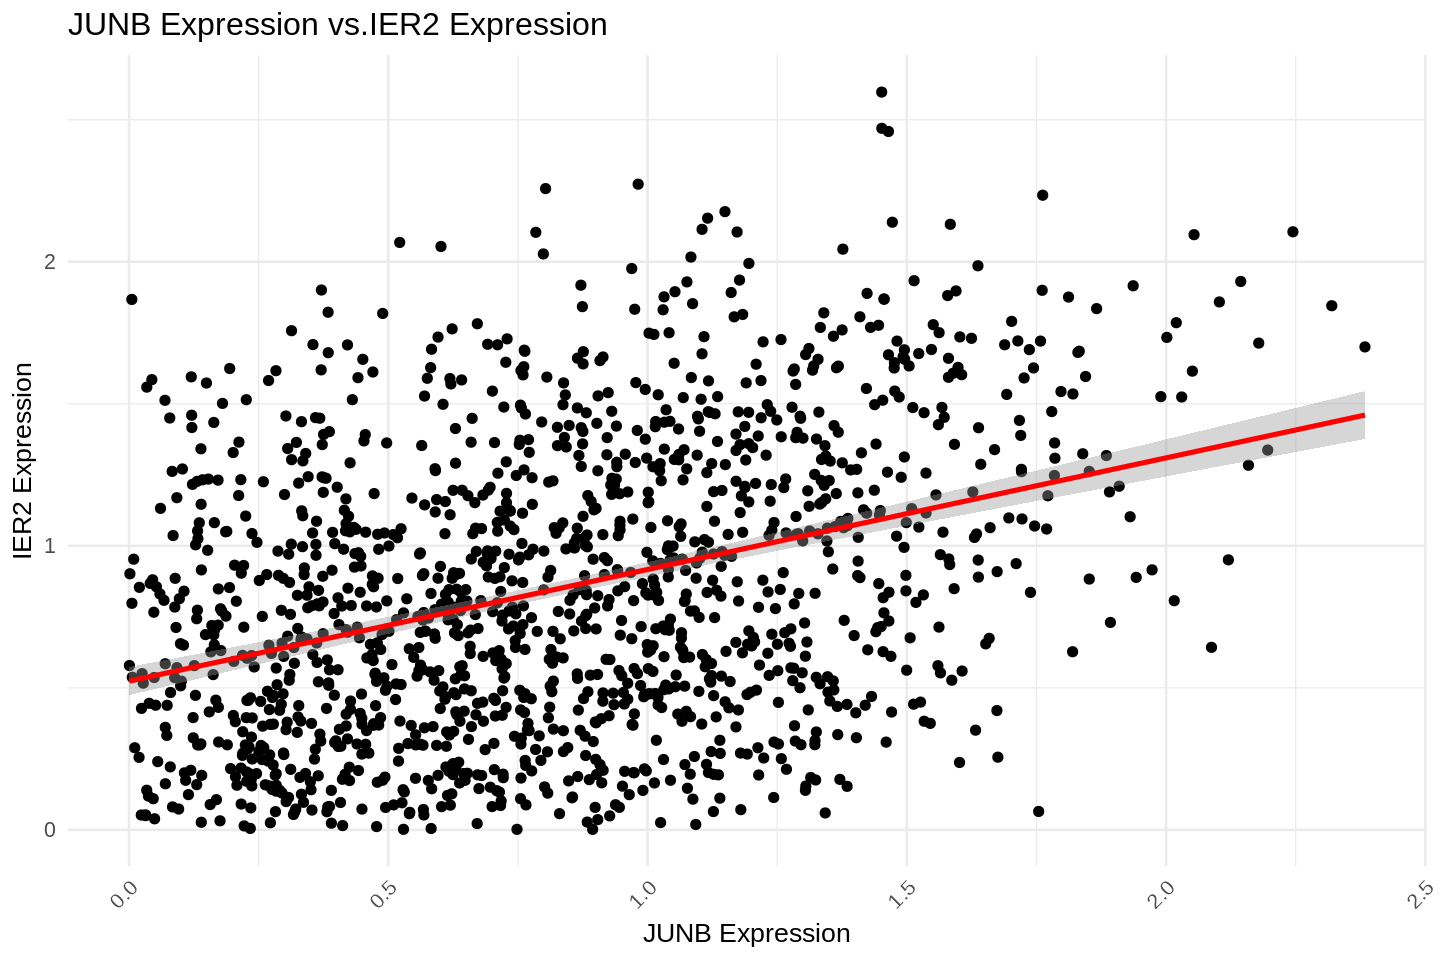

In [ ]:
options(repr.plot.width = 12, repr.plot.height = 8)

geneexpression <- ggplot(filtered_meta, aes(x = JUNB, y = IER2)) +
                geom_point() +
                geom_smooth(method = "lm", color = "red", se = TRUE) +
                theme_minimal(base_size = 16) +
                labs(title = "JUNB Expression vs.IER2 Expression",
                x = "JUNB Expression",
                y = "IER2 Expression") +
                theme(axis.text.x = element_text(angle = 45, hjust = 1))
geneexpression

**Add the Rsquared value onto the plot**

`geom_smooth()` using formula = 'y ~ x'


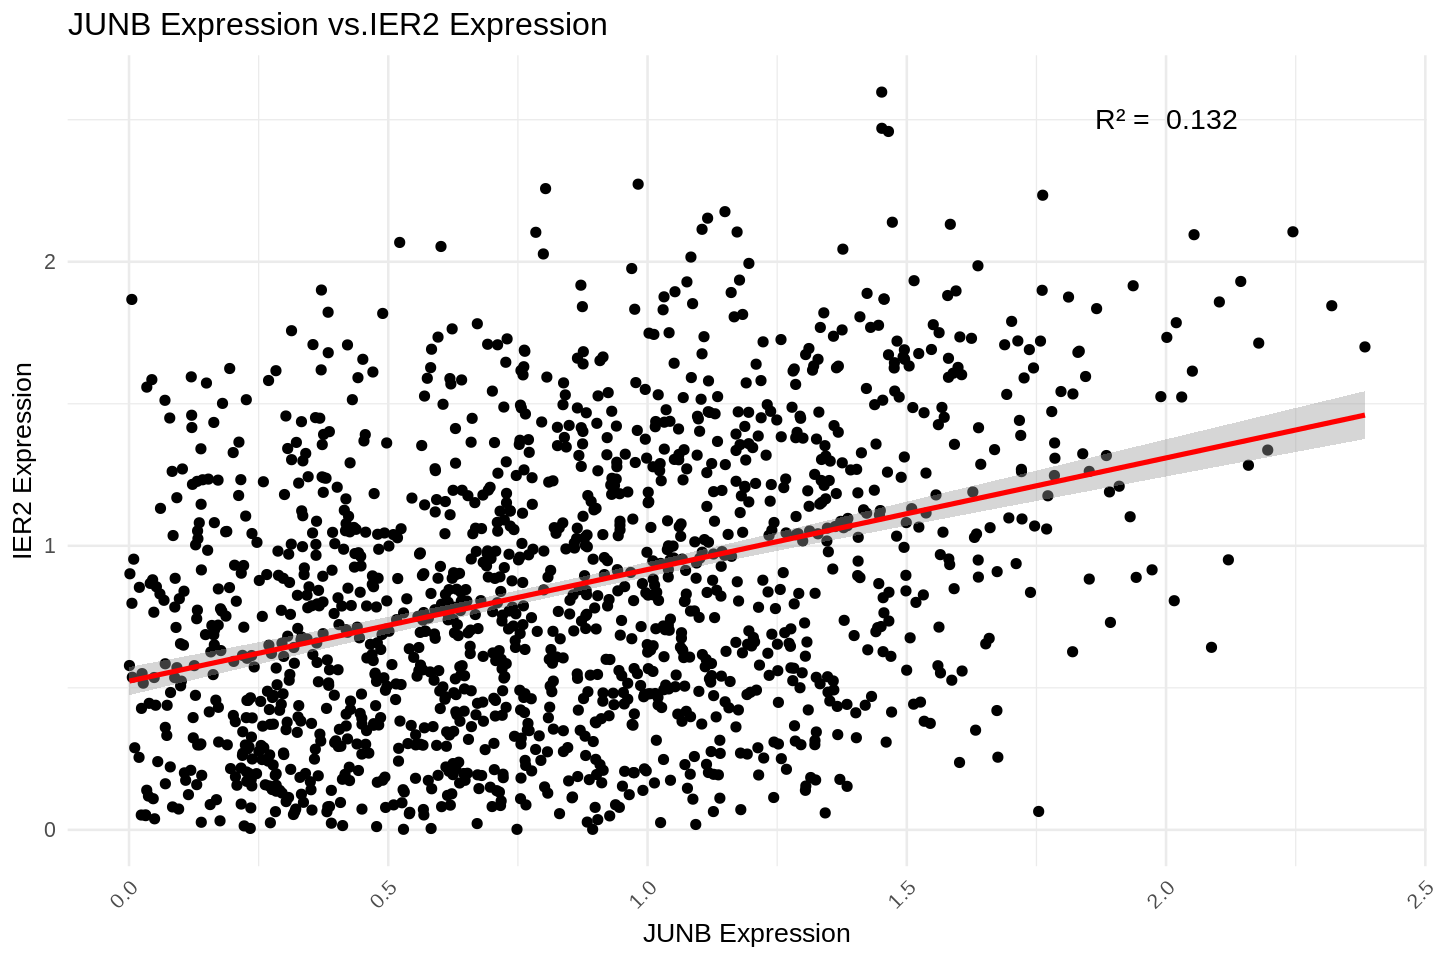

In [ ]:
r_squared <- summary(model)$r.squared

geneexpression<- geneexpression + annotate("text", x = 2, y = 2.5, label = paste("R² = ", round(r_squared,3)), size=6)
geneexpression


**7.Colour the points by disease stage or tissue type**


`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'


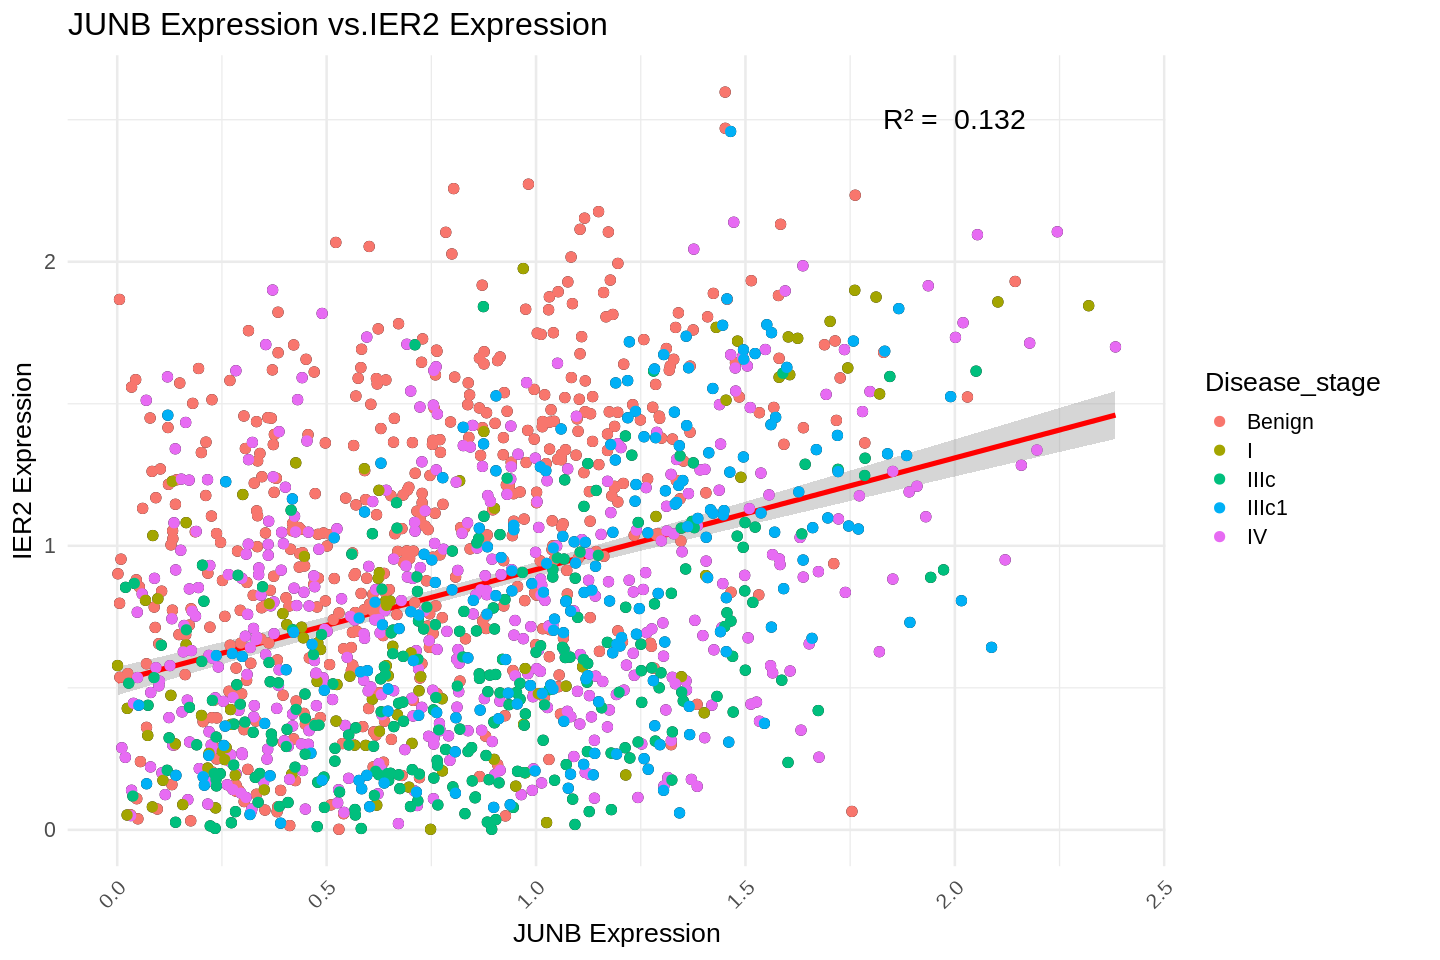

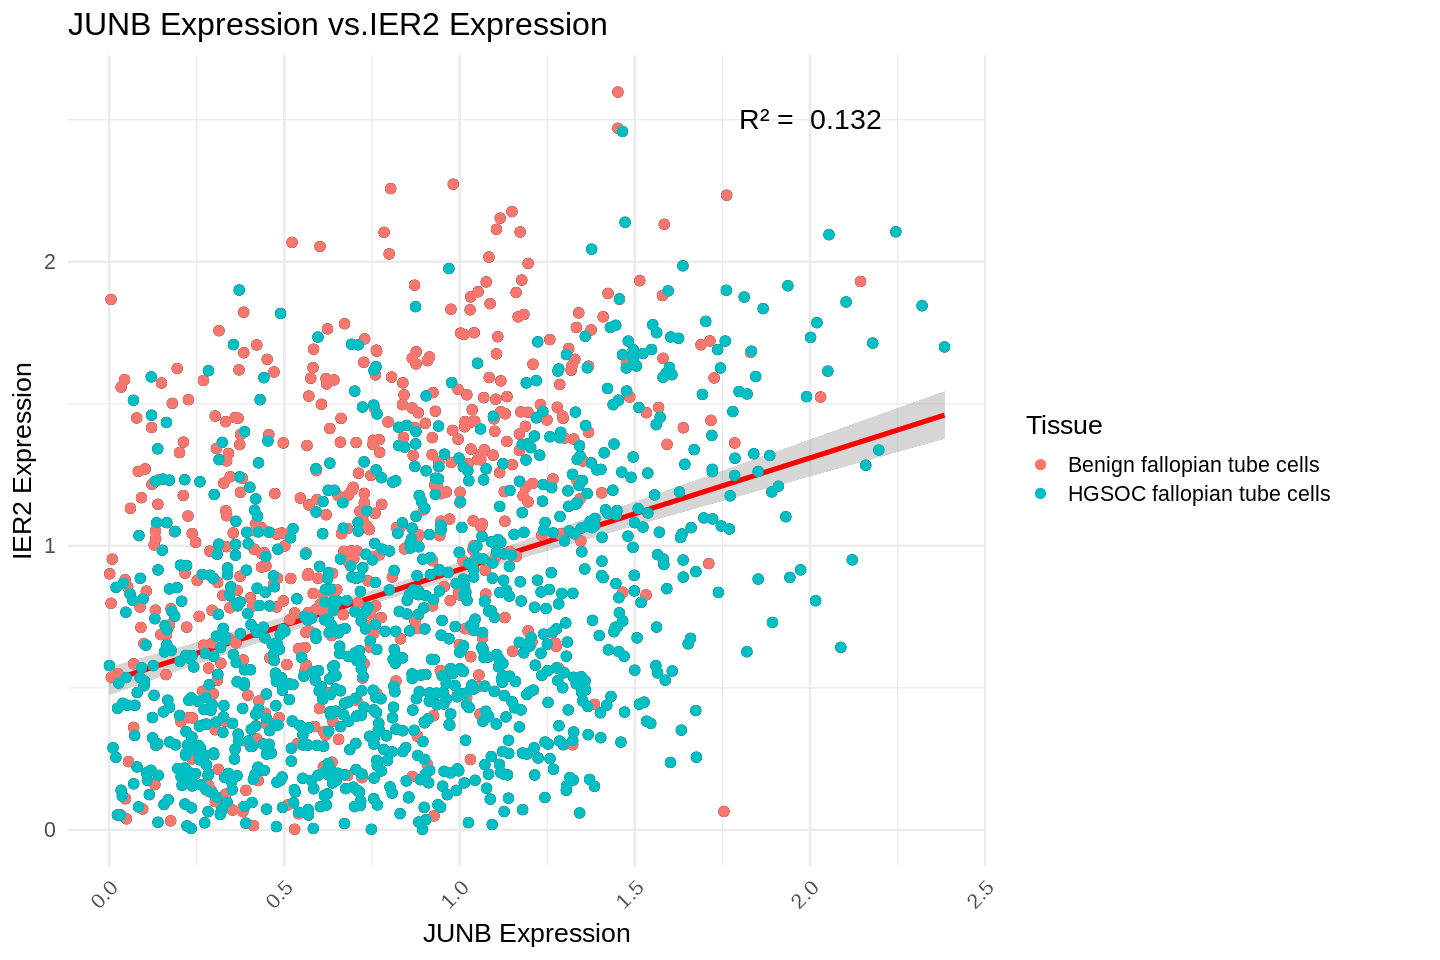

In [ ]:
stagegeneexpression<- geneexpression + geom_point(aes(color=Disease_stage))
stagegeneexpression

tissuegeneexpression<- geneexpression + geom_point(aes(color=Tissue))
tissuegeneexpression

##**Correlate several genes against eachother using a correlation matrix**:

In this step, we performed a gene-gene correlation analysis to identify co-regulated gene modules and functional networks within the secretory epithelial population. To ensure statistical robustness, we first filtered out invariant genes (standard deviation = 0) and then calculated a Pearson correlation matrix for the remaining feature set. To focus on the most biologically significant relationships, we applied a threshold to retain only those gene pairs exhibiting a strong positive correlation (r>0.6). The resulting high-correlation subset was visualized using a heatmap with hierarchical clustering, which organizes the genes into distinct blocks. This visualization allows us to detect groups of co-expressed genes that likely function together in specific cellular pathways or regulatory circuits.

**Remove values with a standard deviation of 0, as this will break the correlation matrix**

In [ ]:
secretoryexp<- secretoryexp[,apply(secretoryexp,2, sd) > 0]

**Correlate genes against eachother**

In [ ]:
cordata<-cor(secretoryexp [colnames(secretoryexp)],
             secretoryexp[colnames(secretoryexp)])

**Plot a heatmap of the correlation matrix of genes with a correlation score of >0.6**:

agg_record_1071802485 
                    2

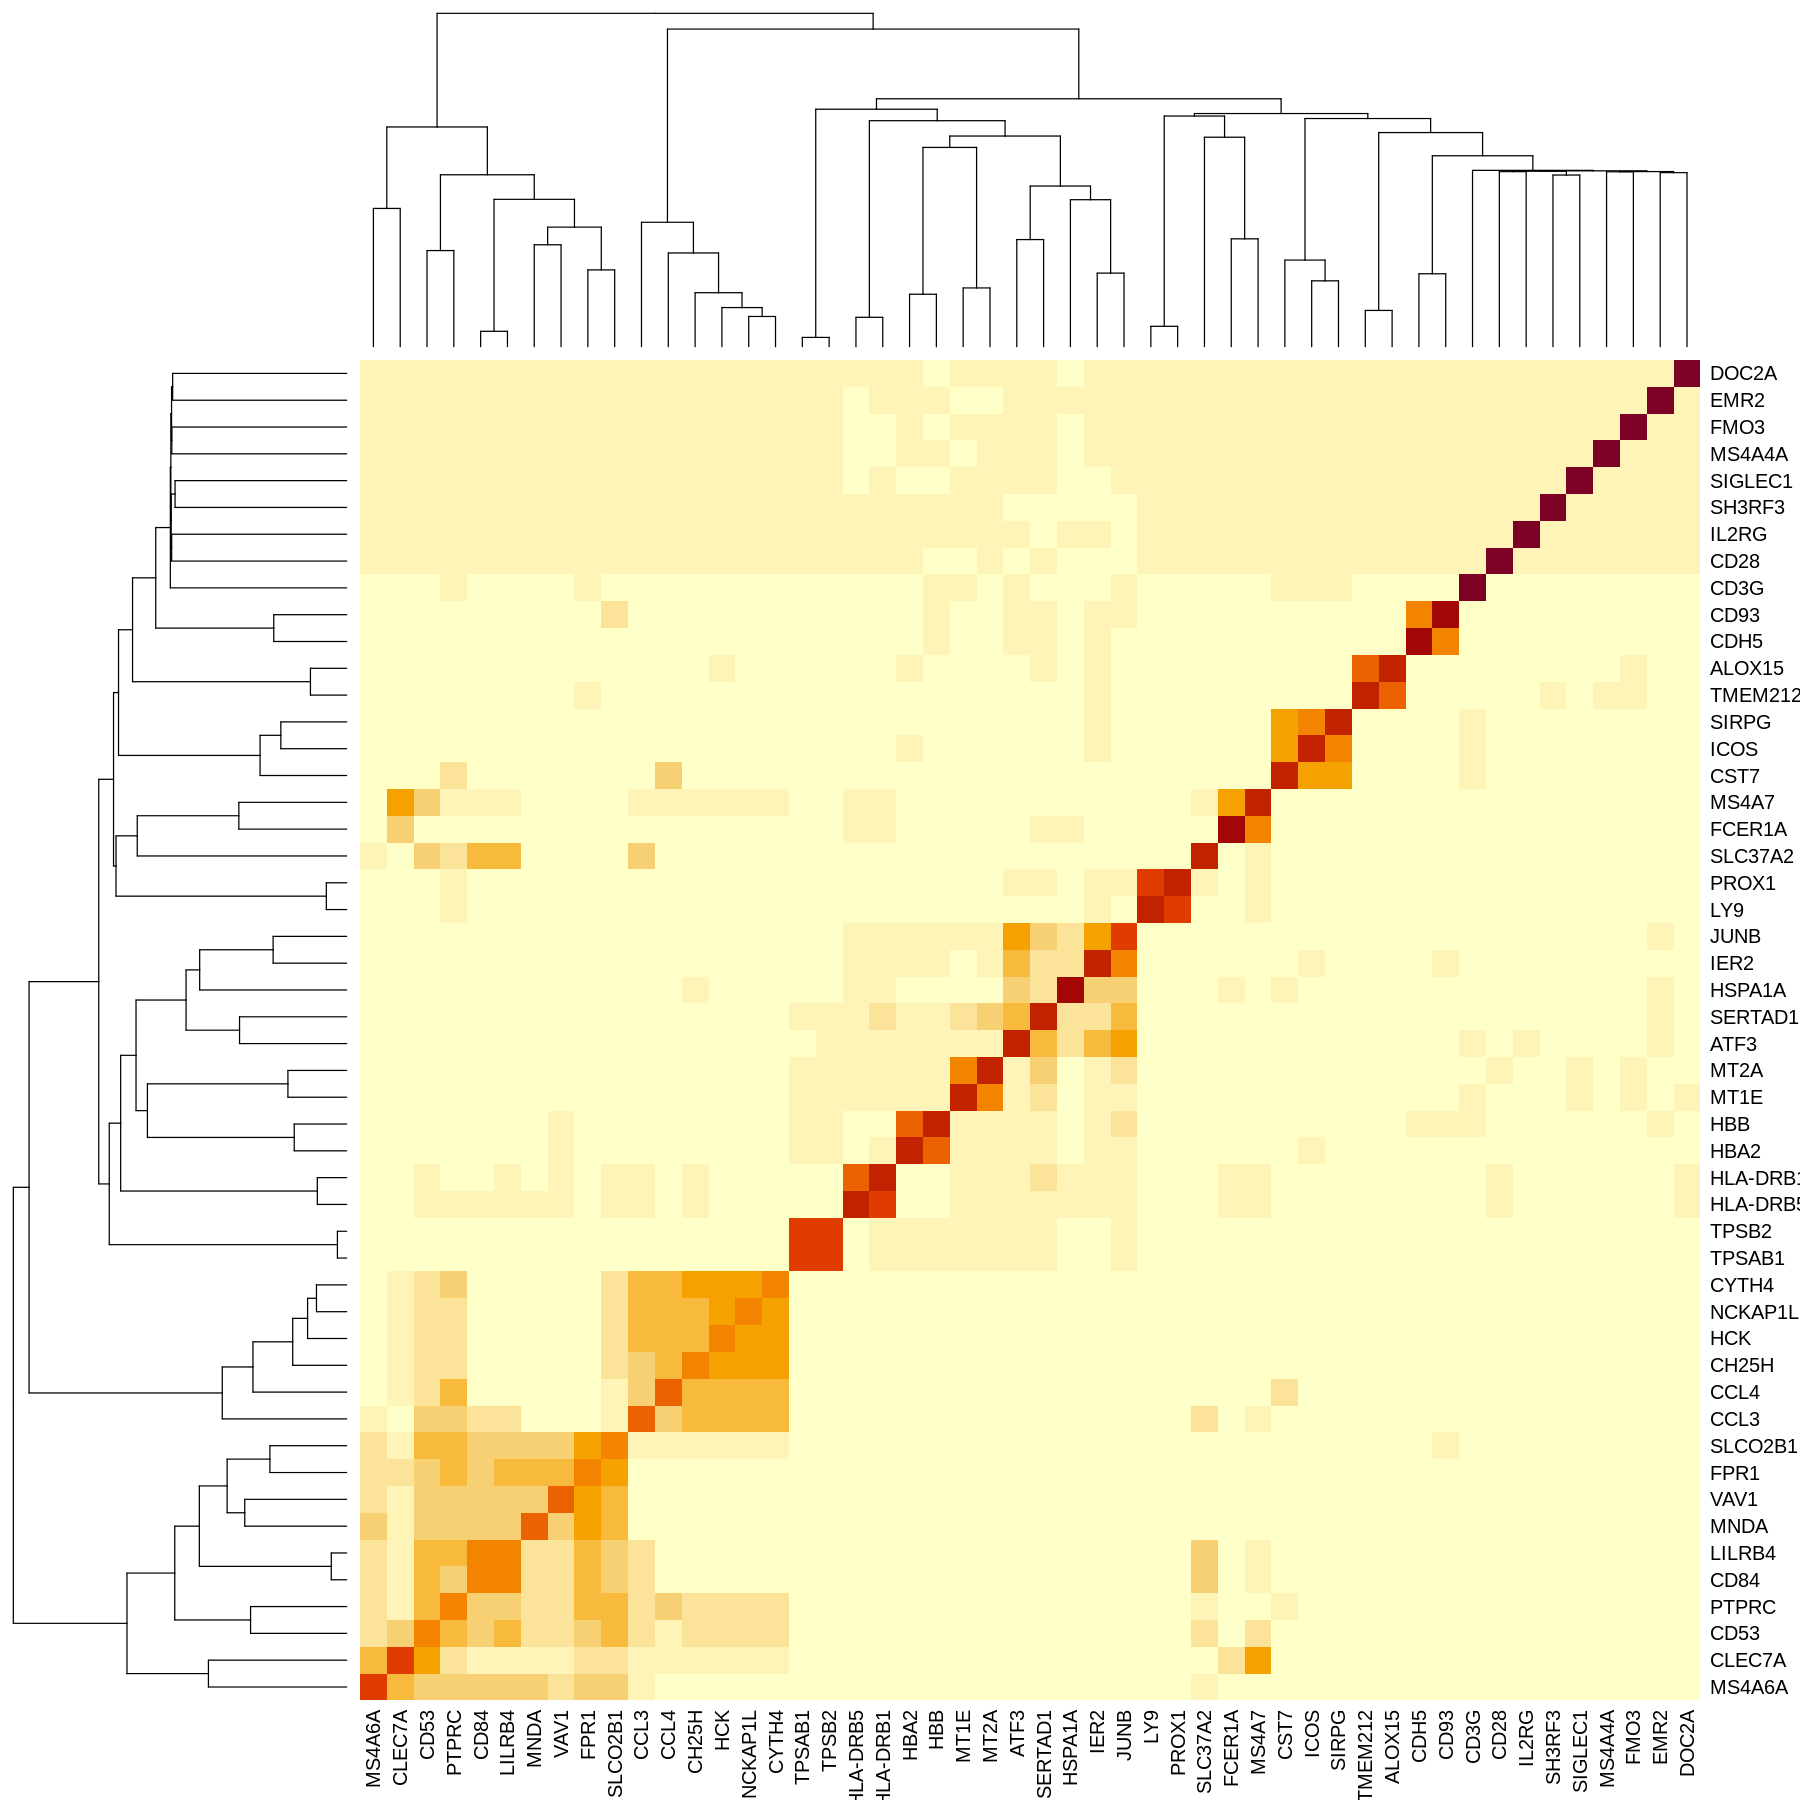

In [ ]:
upper_tri <- upper.tri(cordata)
high_corr<-which(upper_tri & cordata>0.6, arr.ind=TRUE)

corrplot <- cordata[rownames(cordata) %in% rownames(high_corr),]
corrplot <- corrplot[,colnames(corrplot) %in% rownames(high_corr)]

# Save as PNG
png("/content/heatmap.png", width = 800, height = 800)
heatmap(corrplot,cexRow = 1.2, cexCol = 1.2)
dev.off()

# Display in notebook
heatmap(corrplot,cexRow = 1.2, cexCol = 1.2)

**Figure Explanation**:

The heatmap displays the pairwise Pearson correlation coefficients between genes within the Secretory Epithelial lineage, with dark red indicating strong positive correlation (r>0.6). Hierarchical clustering (dendrograms) groups these genes into distinct functional modules. The analysis reveals specific regulatory programs active within the fallopian tube epithelium:

*   **Stress Response Module**: A clear cluster (middle-right) includes ATF3, JUNB, HSPA1A, and MT2A. These are canonical immediate-early genes and stress response markers. Their tight co-expression suggests a subset of secretory cells is undergoing significant cellular stress (oxidative or proteotoxic), which aligns with the hypothesis that chronic stress in the fallopian tube epithelium is a precursor event for STIC lesion formation and HGOC.

*   **Immune Interaction Module**: The large cluster on the bottom left contains PTPRC (CD45), CD53, and chemokines like CCL3 and CCL4. The presence of these immune-associated genes within the secretory subset likely reflects a highly inflammatory microenvironment where epithelial cells are either actively recruiting immune cells or are intimately associated with infiltrating leukocytes, further supporting the role of inflammation in early disease progression.





  